<a href="https://colab.research.google.com/github/Siu0901/AI_study/blob/main/%EC%9E%90%EB%8F%99_%EB%AF%B8%EB%B6%84%EA%B3%BC_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [160]:
data = pd.read_csv('student_info.csv')
data

,no,gender,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170
...,...,...,...,...
85,88,f,100,190
86,89,f,54,163
87,90,f,57,161
88,91,f,101,198


In [161]:
x = data.height_cm.tolist()
y = data.weight_kg.tolist()

In [162]:
# 분명 원래 함수 w와 b밖에 없었는데 모델 손실 줄인다고 별 수정 다하다
# 함수가 3차함수가 되어버리고 가중치와 편향이 이렇게 야랄남
w = tf.Variable(0.1, dtype=tf.float32)
b = tf.Variable(1.0, dtype=tf.float32)
c = tf.Variable(np.mean(y), dtype=tf.float32)
d = tf.Variable(0.0, dtype=tf.float32)

In [163]:
# 진짜 와 1차함수 만으론 잘 안되니까 2차갔다가
# 3차함수로까지 다시 수정하네
@tf.function
def linear_model(x):
    return w * x**3 + b * x**2 + c * x + d

def loss_d(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [164]:
x_test = [3.5, 5, 5.5, 6]
y_test = [4,5,6,7]
# 여기서 linear 모델에 넣을 때 텐서로 변환하는데 뭐 3차함수에 텐서플로우 연산인
# 제곱 연산이 포함되어 있어 텐서로 바꾼다네 ㅅㅂ
print(linear_model(tf.constant(x_test, dtype=tf.float32)).numpy())
a = loss_d(linear_model(tf.constant(x_test, dtype=tf.float32)), tf.constant(y_test, dtype=tf.float32))
print(a.numpy())

[263.05417 389.6667  434.27084 480.2    ]
155602.92


In [165]:
optimizer = tf.optimizers.SGD(1e-1)

In [166]:
# 이게 데이터 범위 줄이는 코드인데 줄인 이유가
# 지금 보면 숫자가 너무 커 제곱할 때 값이 크게 폭발하기 때문에
# 데이터 분포 형태를 유지하되 값의 범위를 조정하는 코드임
# 근데 또 그렇다고 단순히 값의 범위를 줄인것은 또 아니라하니까 이게 더럽게 햇갈리네
# 여긴 좀 찾아봐야겠다
x_scaled = (x - np.mean(x)) / np.std(x)

In [167]:
epochs = 2000
for i in range(epochs):
  with tf.GradientTape() as tape:
    y_pred = linear_model(tf.constant(x_scaled, dtype=tf.float32))
    loss = loss_d(tf.constant(y, dtype=tf.float32), tf.constant(y_pred, dtype=tf.float32)) # Corrected order: y_true, y_pred

  gradient = tape.gradient(loss, [w, b, c, d])
  optimizer.apply_gradients(zip(gradient, [w, b, c, d]))
  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4f} | c의 값 : {:5.4f} | d의 값 : {:5.4f} | loss : {:5.6f}".format(i, w.numpy(), b.numpy(), c.numpy(), d.numpy(), loss)) # Added 'd' to print output

epoch :   0 | w의 값 : -31.9440 | b의 값 : 13.4600 | c의 값 : 57.0230 | d의 값 : 13.8830 | loss : 9479.465820
epoch :  10 | w의 값 : -14.6871 | b의 값 : 7.8079 | c의 값 : 44.7735 | d의 값 : 56.2691 | loss : 570.205444
epoch :  20 | w의 값 : -11.4901 | b의 값 : 2.7488 | c의 값 : 35.9957 | d의 값 : 67.2630 | loss : 273.477661
epoch :  30 | w의 값 : -9.5029 | b의 값 : 1.5366 | c의 값 : 30.2072 | d의 값 : 70.1338 | loss : 219.260025
epoch :  40 | w의 값 : -7.9967 | b의 값 : 1.5003 | c의 값 : 25.8580 | d의 값 : 70.4967 | loss : 196.753845
epoch :  50 | w의 값 : -6.7781 | b의 값 : 1.7876 | c의 값 : 22.3562 | d의 값 : 70.1397 | loss : 182.345871
epoch :  60 | w의 값 : -5.7655 | b의 값 : 2.1328 | c의 값 : 19.4520 | d의 값 : 69.6243 | loss : 172.220001
epoch :  70 | w의 값 : -4.9150 | b의 값 : 2.4576 | c의 값 : 17.0146 | d의 값 : 69.1199 | loss : 164.999374
epoch :  80 | w의 값 : -4.1978 | b의 값 : 2.7427 | c의 값 : 14.9597 | d의 값 : 68.6714 | loss : 159.839432
epoch :  90 | w의 값 : -3.5919 | b의 값 : 2.9872 | c의 값 : 13.2241 | d의 값 : 68.2850 | loss : 156.150970
epoch

In [173]:
x_test = [170]
x_test_scaled = (x_test - np.mean(x)) / np.std(x)
print(linear_model(tf.constant(x_test_scaled, dtype=tf.float32)).numpy())

[66.61046]


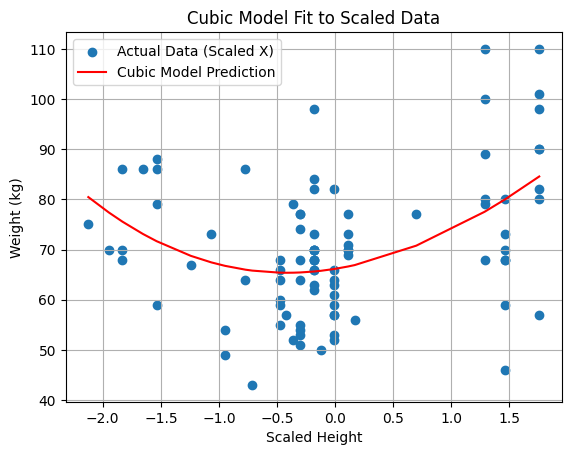

In [175]:
# 모델이 데이터에 얼마나 잘 맞춰지는지 확인하기 위해 제미나이 한테 그려달라함
# 이게 보니까 데이터들이 너무 들쭉날쭉 해서 확실히 예측이 쉽지가 않네

import matplotlib.pyplot as plt

# Sort scaled x and corresponding y for plotting
sorted_indices = np.argsort(x_scaled)
x_scaled_sorted = x_scaled[sorted_indices]
y_sorted = np.array(y)[sorted_indices] # Ensure y is a NumPy array for indexing

# Get predictions from the trained model on the sorted scaled data
y_pred_sorted = linear_model(tf.constant(x_scaled_sorted, dtype=tf.float32)).numpy()

# Plot the original scaled data points
plt.scatter(x_scaled, y, label='Actual Data (Scaled X)')

# Plot the model's predictions
plt.plot(x_scaled_sorted, y_pred_sorted, color='red', label='Cubic Model Prediction')

plt.xlabel('Scaled Height')
plt.ylabel('Weight (kg)')
plt.title('Cubic Model Fit to Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# 일단 결론은 단순 선형 회귀 모델론 지금처럼 키를 통해 몸무게 예측하는게 힘듦
# 값의 범위가 너무 들쭉날쭉이기도 하고 몸무게 요인도 성별, 유전적 요인 등 다양하기에
# 좀 무리수였다.
# 나중에 더 공부해서 다른 모델로 다시 한번 도전해보자